<a href="https://colab.research.google.com/github/vmpreciado/NETS3120/blob/main/TwitterImport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's start by loading some libraries...

In [1]:
pip install matplotlib networkx

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In this notebook, we will analyze real-world Twitter data from the SNAP dataset at Stanford:

https://snap.stanford.edu/data/ego-Twitter.html

Download the file 'twitter_combined.txt.gz', decompress the .gz, and save the .txt using your favorite name. Move this .txt file to the folder you want to use to run Python. In this case, I have renamed the file as 'TwitterLinksSmall.txt' and save it in a folder called 'ColabNotebooks' inside my Google Drive.

If you want to import the file from your Google Drive, you should use a piece of code similar to the one below...

In [3]:
from google.colab import drive
drive.mount('/content/drive') # You will need to give Google Colab access to your Google Drive after running this line

# Replace the string below with the path of your text file in Google Drive
file_path = '/content/drive/My Drive/ColabNotebooks/TwitterLinksSmall.txt'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let's look the format of the first 20 lines in the .txt file...

In [12]:
# Open the file
with open(file_path, 'r') as file:
    # Read the first 20 lines
    for i in range(20):
        line = file.readline()
        # Check if we have reached the end of the file
        if not line:
            break
        print(line.strip())  # .strip() removes any trailing newline character
print('... the list of edges goes on...')

214328887 34428380
17116707 28465635
380580781 18996905
221036078 153460275
107830991 17868918
151338729 222261763
19705747 34428380
222261763 88323281
19933035 149538028
158419434 17434613
149538028 153226312
364971269 153226312
100581193 279787626
113058991 69592091
151338729 187773078
406628822 262802533
460282402 88323281
280935165 437804658
222261763 27633075
285312927 151338729
... the list of edges goes on...


In each line, you have a pair defining a directed edge in Twitter of who-follows-who (the first entry is the follower).

This graph was built by stitching together a set of ego-networks, i.e., the immediate neighbors (and their connections) of a collection of individuals from the Stanford group that retrieved the data.

This piece of code converts the list of edges in the *.txt file into a DiGraph object called D in Python...

In [5]:
# Create a directed graph with the variable name D
D = nx.DiGraph()

# Open the file and read line by line
with open(file_path, 'r') as file:
    for line in file:
        # Split the line into source and target
        source, target = map(int, line.split())
        # Add an edge to the graph
        D.add_edge(source, target)

# At this point, D contains your directed graph

Let's see how many individuals we have in this Twitter subgraph...

In [6]:
num_nodes = len(D.nodes())
num_edges = len(D.edges())
print("Number of Nodes:", num_nodes)
print("Number of Nodes:", num_edges)

Number of Nodes: 81306
Number of Nodes: 1768149


Let's take a look at the (non-symmetric) adjacency matrix of the Twitter DiGraph

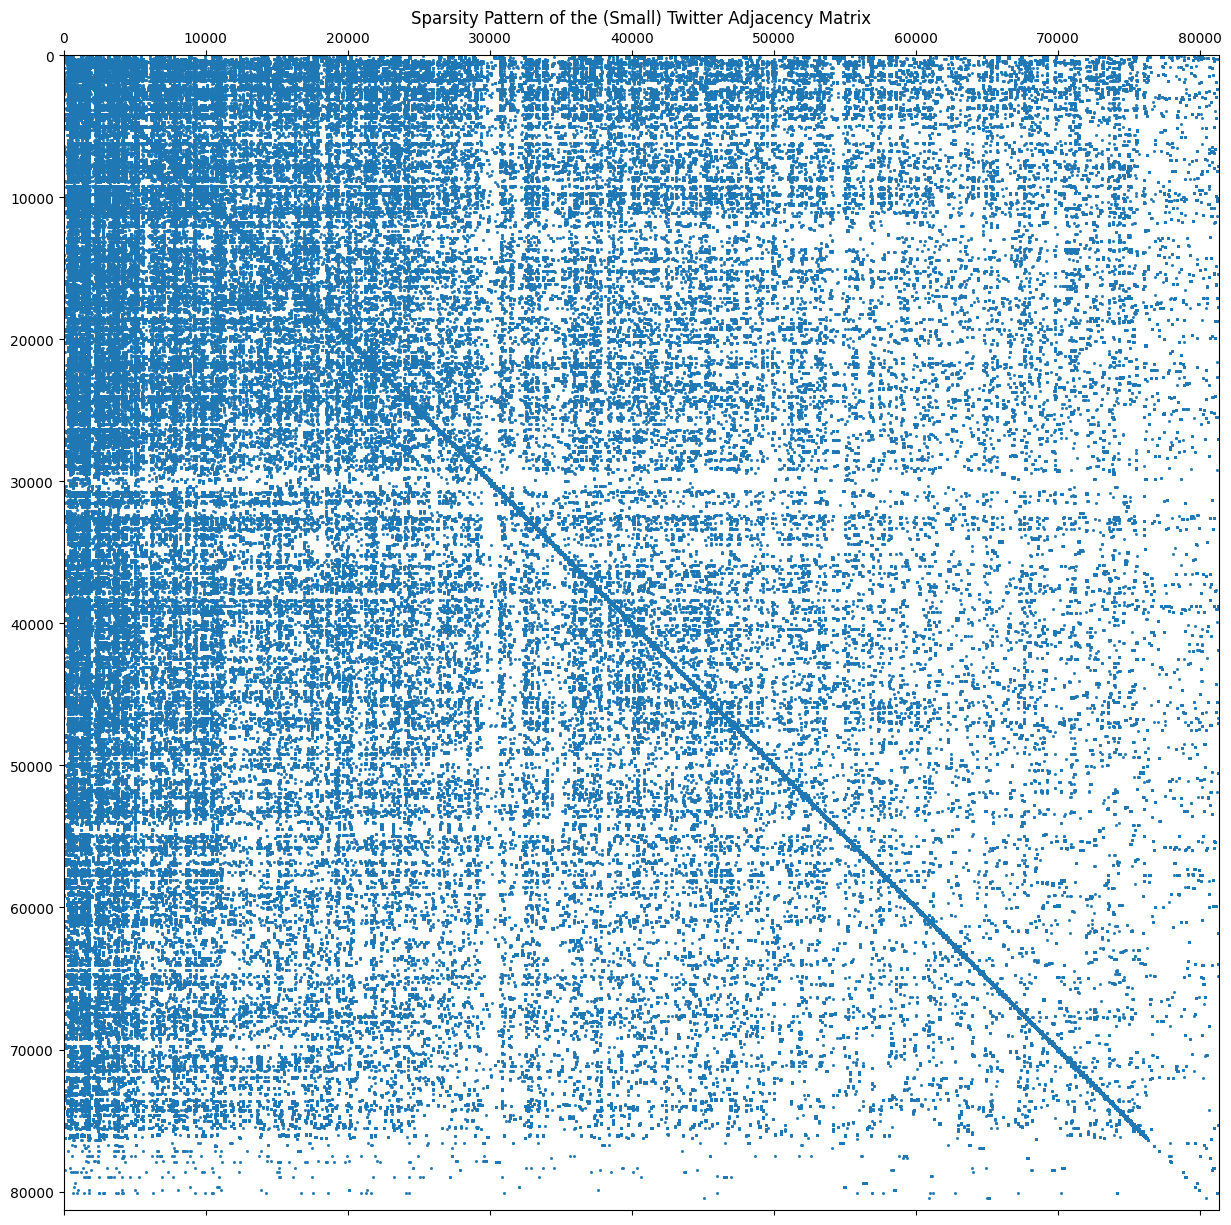

In [7]:
# Get the adjacency matrix as a sparse matrix
adj_matrix = nx.adjacency_matrix(D)

# Set a large figure size (width, height in inches)
plt.figure(figsize=(15, 15))

# Use Matplotlib's spy function to plot the sparsity pattern of the adjacency matrix
plt.spy(adj_matrix, markersize=1)
plt.title("Sparsity Pattern of the (Small) Twitter Adjacency Matrix")
plt.show()

The total number of potential connections in a directed graph with n nodes is n^2. For n=81306, this number is ~6.6Bn; however, in this graph, only ~1.7Mn of these connections are realized. In this case, we say that the graph is sparse, since 6.6Bn/1.7Mn is a very small number (0.00026). In other words, only ~0.03% of all potential edges are realized.

While dealing with large sparse graphs, it is convenient to use an Adjacency List to represent the data. This is built using the following code.

In [8]:
# Generate the adjacency list
adj_list = list(D.adjacency())

Let's see the list of neighbors of a particular node u

In [14]:
# To get the list of adjacent nodes (neighbors) of node 'u'
u=7302682           # This number is an internal identifier used by Twitter to codify each individual
neighbors_of_u = list(D.neighbors(u)) # Convert into a list for easier visualization

# neighbors_of_u now contains the list of nodes adjacent to 'u'
print("Neighbors of", u, ":", neighbors_of_u)

# Printing the number of neighbors of u
print("Number of neighbors of node", u, ":", len(neighbors_of_u))

Neighbors of 7302682 : [22108185, 358346423, 18107941, 15108672, 17868918, 17503591, 17968886, 52144222, 31331740, 18323672, 103755670, 36663339, 31019764, 8437922, 100312878, 36767299, 16729508, 65974071, 49737738, 121484229, 35324363, 16971389]
Number of neighbors of node 7302682 : 22
